In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
df= pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<bound method DataFrame.corr of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
neighbors= np.arange(1,9)

In [20]:
neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [21]:
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

In [26]:
test_accuracy

array([0.e+000, 0.e+000, 0.e+000, 0.e+000, 0.e+000, 5.e-324, 5.e-324,
       0.e+000])

In [27]:
for i, k in enumerate(neighbors):
    knn= KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    train_accuracy[i]=knn.score(X_train,y_train)
    
    test_accuracy[i]= knn.score(X_test,y_test)

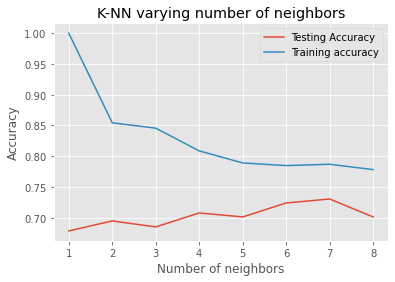

In [29]:
plt.title('K-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy,label='Testing Accuracy')
plt.plot(neighbors, train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
knn=KNeighborsClassifier(n_neighbors=7)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
knn.score(X_test,y_test)

0.7305194805194806

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
y_pred= knn.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

In [36]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



### ROC Curve

In [39]:
y_pred_proba= knn.predict_proba(X_test)[:,1]

In [40]:
from sklearn.metrics import roc_curve

In [41]:
fpr, tpr, thresholds= roc_curve(y_test,y_pred_proba)

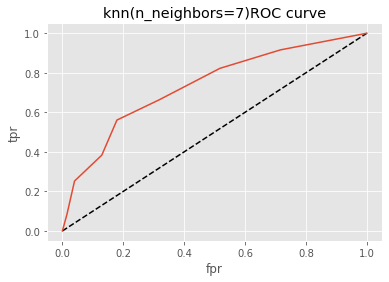

In [42]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors=7)ROC curve')
plt.show()